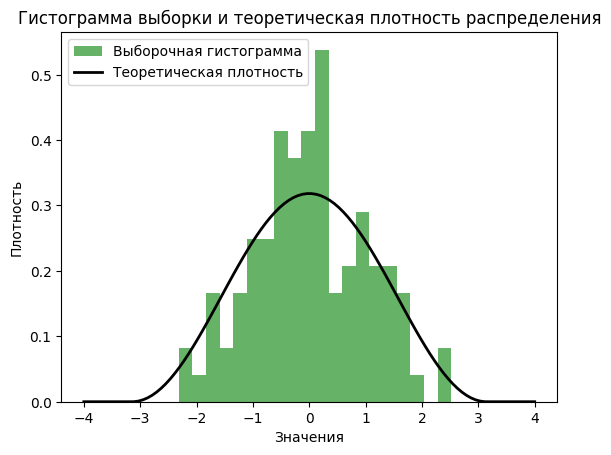

Выборочное среднее: 0.019712772510959136
Выборочная дисперсия: 1.03343048302981


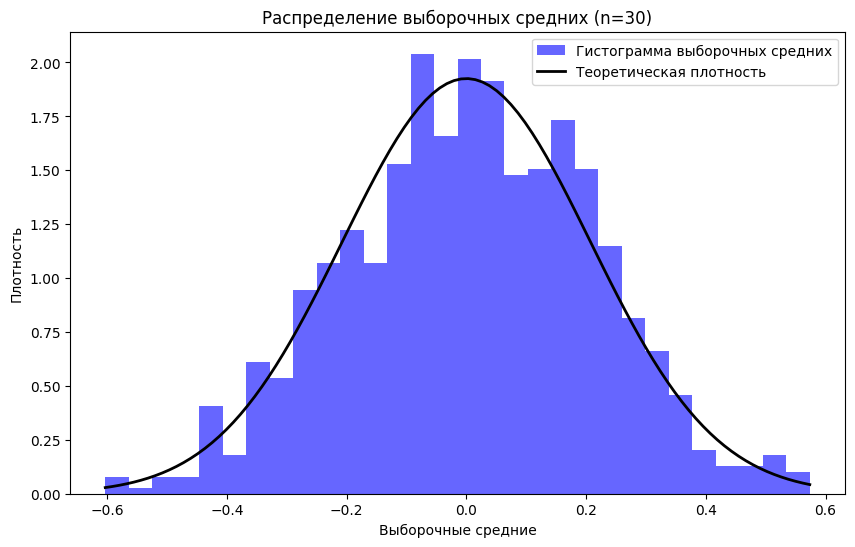

Выборочное среднее (n=30): 0.0070
Выборочная дисперсия (n=30): 0.0426


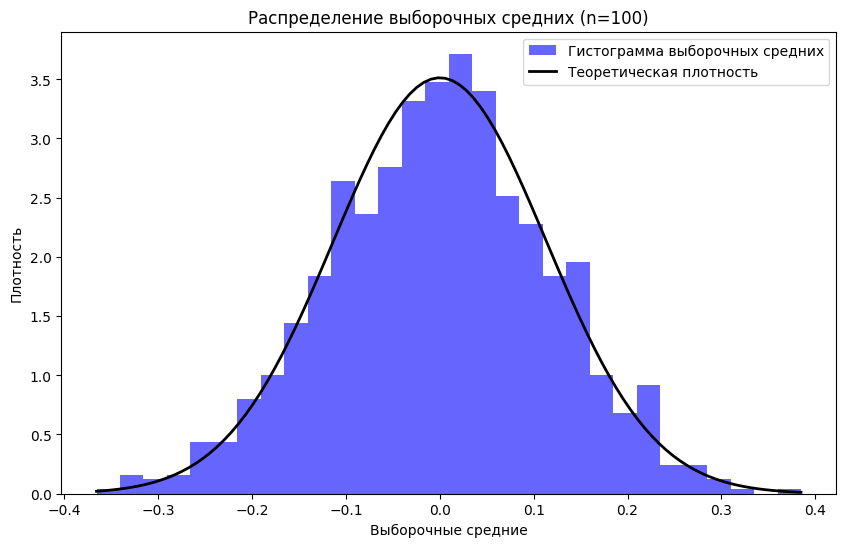

Выборочное среднее (n=100): -0.0001
Выборочная дисперсия (n=100): 0.0135


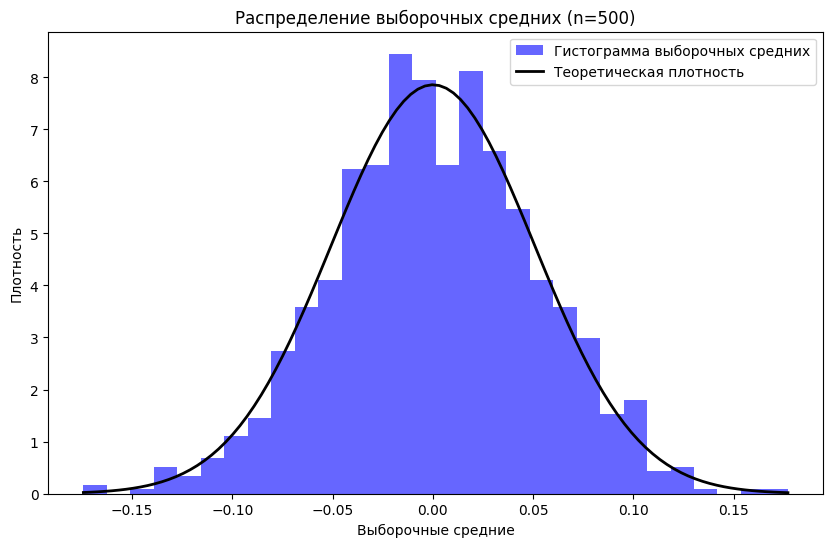

Выборочное среднее (n=500): 0.0009
Выборочная дисперсия (n=500): 0.0026
Churn status: False
Mean: 100.28
Variance: 392.09
Count: 2850.0
Confidence Interval (manual): (np.float64(99.55618833318324), np.float64(101.01012745629045))
Confidence Interval (statsmodels): (np.float64(99.55618833318324), np.float64(101.01012745629045))

Churn status: True
Mean: 101.34
Variance: 465.80
Count: 483.0
Confidence Interval (manual): (np.float64(99.41066229112079), np.float64(103.26014516229537))
Confidence Interval (statsmodels): (np.float64(99.41066229112079), np.float64(103.26014516229537))



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import _zconfint_generic
%matplotlib inline

# Генерация выборки из косинусного распределения
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)

# Параметры распределения
real_mean = cosine_rv.mean() # настоящее среднее случайной величины
real_var = cosine_rv.var()   # настоящая дисперсия случайной величины

# Построение гистограммы выборки и теоретической плотности распределения
plt.hist(sample, bins=20, density=True, alpha=0.6, color='g', label='Выборочная гистограмма')
x = np.linspace(-4, 4, 100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, 'k-', lw=2, label='Теоретическая плотность')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки и теоретическая плотность распределения')
plt.legend()
plt.show()

# Выборочное среднее и дисперсия
sample_mean = sample.mean()
sample_var = sample.var()
print(f"Выборочное среднее: {sample_mean}")
print(f"Выборочная дисперсия: {sample_var}")
def plot_sample_means_distribution(dist_rv, sample_size, num_samples=1000, real_mean=0, real_var=1, file_name=None):
    means = []
    for _ in range(num_samples):
        sample = dist_rv.rvs(size=sample_size)
        means.append(sample.mean())
        
    sample_mean = np.mean(means)
    sample_var = np.var(means, ddof=1)
    
    plt.figure(figsize=(10, 6))
    plt.hist(means, bins=30, density=True, alpha=0.6, color='b', label='Гистограмма выборочных средних')
    
    # Теоретическое распределение выборочного среднего
    x = np.linspace(min(means), max(means), 100)
    pdf = sts.norm.pdf(x, loc=real_mean, scale=math.sqrt(real_var / sample_size))
    plt.plot(x, pdf, 'k-', lw=2, label='Теоретическая плотность')
    
    plt.xlabel('Выборочные средние')
    plt.ylabel('Плотность')
    plt.title(f'Распределение выборочных средних (n={sample_size})')
    plt.legend()
    
    if file_name:
        plt.savefig(file_name)  # Сохранение графика
    
    plt.show()
    
    print(f'Выборочное среднее (n={sample_size}): {sample_mean:.4f}')
    print(f'Выборочная дисперсия (n={sample_size}): {sample_var:.4f}')

# Примеры для разных объемов выборок
plot_sample_means_distribution(cosine_rv, sample_size=30, num_samples=1000, real_mean=real_mean, real_var=real_var, file_name='распределение выборочных средних 30.png')
plot_sample_means_distribution(cosine_rv, sample_size=100, num_samples=1000, real_mean=real_mean, real_var=real_var, file_name='распределение выборочных средних 100.png')
plot_sample_means_distribution(cosine_rv, sample_size=500, num_samples=1000, real_mean=real_mean, real_var=real_var, file_name='распределение выборочных средних 500.png')
# Загрузка данных
url = "https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df = pd.read_csv(url)

# Делим данные по колонке churn
grouped = df.groupby('churn')['total day calls']

# Рассчитываем среднее и дисперсию для каждой группы
stats = grouped.agg(['mean', 'var', 'count'])

# Функция для расчета доверительного интервала
def calculate_confidence_interval(mean, var, n, confidence=0.95):
    std_mean = math.sqrt(var / n)
    z = sts.norm.ppf((1 + confidence) / 2)
    return (mean - z * std_mean, mean + z * std_mean)

# Для каждой группы churn
results = {}
for churn_status, stats_row in stats.iterrows():
    mean = stats_row['mean']
    var = stats_row['var']
    n = stats_row['count']
    ci = calculate_confidence_interval(mean, var, n)
    
    # Используем _zconfint_generic для проверки
    std_mean = math.sqrt(var / n)
    ci_statsmodels = _zconfint_generic(mean, std_mean, alpha=0.05, alternative='two-sided')
    
    results[churn_status] = {
        'mean': mean,
        'variance': var,
        'count': n,
        'confidence_interval': ci,
        'ci_statsmodels': ci_statsmodels
    }

# Выводим результаты
for churn_status, result in results.items():
    print(f"Churn status: {churn_status}")
    print(f"Mean: {result['mean']:.2f}")
    print(f"Variance: {result['variance']:.2f}")
    print(f"Count: {result['count']}")
    print(f"Confidence Interval (manual): {result['confidence_interval']}")
    print(f"Confidence Interval (statsmodels): {result['ci_statsmodels']}")
    print()
